**IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef,roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate, KFold

**LOADING THE DATASET**

In [2]:
data = pd.read_csv('C:\pd1.csv')

**DESCRIBING THE DATASET**

In [3]:
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,...,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,130.189474,0.463158,0.753408,0.688103,0.463003,340.232456,338.965789,0.006137,0.000352,0.002015,...,29.793286,32.811450,25.928015,19.599907,14.183743,11.716356,11.245770,13.054491,12.924185,25.954784
std,73.958553,0.498860,0.166196,0.070485,0.138702,107.593418,107.623248,0.001909,0.000691,0.002300,...,54.838802,48.566068,36.229922,27.267363,20.473726,16.827276,15.141868,14.555607,13.496989,32.005206
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.342700,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000
25%,65.000000,0.000000,0.771913,0.634445,0.360170,262.000000,261.000000,0.004724,0.000042,0.000840,...,1.893550,2.917775,3.457325,3.350300,3.058575,2.898300,3.068875,3.448650,3.454650,3.684250
50%,131.500000,0.000000,0.811390,0.681275,0.457420,332.000000,331.000000,0.005803,0.000072,0.001360,...,3.829150,7.098450,7.738650,6.180750,4.668700,4.266100,4.494550,5.642000,5.928900,6.770900
75%,195.000000,1.000000,0.837028,0.744590,0.560030,407.000000,406.000000,0.007203,0.000144,0.002220,...,26.739300,46.029525,34.280175,22.426700,13.307175,10.353400,9.885050,17.740750,18.605925,42.016500
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,355.516100,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700


In [4]:
print(data.shape) #gives the no:of instances and no:of features in the dataset
data.head()

(1140, 755)


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,41,0,0.80259,0.55221,0.15430,602,601,0.003207,0.000017,0.00021,...,95.2361,59.7797,33.1091,10.7541,4.2978,3.5306,3.1090,2.7442,3.5607,3.6258
1,41,0,0.88763,0.56345,0.17873,578,577,0.003344,0.000015,0.00023,...,32.5919,15.6691,7.2507,3.0606,2.7429,2.7060,2.9150,2.6399,3.4908,3.9029
2,149,0,0.77201,0.57227,0.18984,554,553,0.003487,0.000015,0.00027,...,69.0308,28.5792,10.9022,5.2229,4.7446,5.9120,4.3724,3.8626,4.3552,4.3942
3,41,0,0.84168,0.60333,0.19559,567,566,0.003408,0.000011,0.00037,...,83.4814,24.2556,8.4510,3.8122,2.3222,2.2785,2.5901,3.0889,4.1543,4.4371
4,48,1,0.78213,0.61626,0.20569,598,597,0.003226,0.000025,0.00037,...,198.2011,166.0853,130.3335,95.0984,62.8886,47.9551,35.2583,18.2340,10.1016,7.5574


In [5]:
data.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_27', 'tqwt_kurtosisValue_dec_28',
       'tqwt_kurtosisValue_dec_29', 'tqwt_kurtosisValue_dec_30',
       'tqwt_kurtosisValue_dec_31', 'tqwt_kurtosisValue_dec_32',
       'tqwt_kurtosisValue_dec_33', 'tqwt_kurtosisValue_dec_34',
       'tqwt_kurtosisValue_dec_35', 'tqwt_kurtosisValue_dec_36'],
      dtype='object', length=755)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Columns: 755 entries, id to tqwt_kurtosisValue_dec_36
dtypes: float64(749), int64(6)
memory usage: 6.6 MB


**DATA PRE-PROCESSING**

**Dropping Unawanted Attributes**

In [7]:
unwanted_attributes = ['id', 'gender']
new_data = data.drop(columns=unwanted_attributes)


In [8]:
new_data.describe()

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1.140000e+03,1140.000000,...,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,0.753408,0.688103,0.463003,340.232456,338.965789,0.006137,0.000352,0.002015,1.410756e-05,0.000502,...,29.793286,32.811450,25.928015,19.599907,14.183743,11.716356,11.245770,13.054491,12.924185,25.954784
std,0.166196,0.070485,0.138702,107.593418,107.623248,0.001909,0.000691,0.002300,1.990293e-05,0.000844,...,54.838802,48.566068,36.229922,27.267363,20.473726,16.827276,15.141868,14.555607,13.496989,32.005206
min,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,6.860000e-07,0.000020,...,1.342700,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000
25%,0.771913,0.634445,0.360170,262.000000,261.000000,0.004724,0.000042,0.000840,4.280000e-06,0.000130,...,1.893550,2.917775,3.457325,3.350300,3.058575,2.898300,3.068875,3.448650,3.454650,3.684250
50%,0.811390,0.681275,0.457420,332.000000,331.000000,0.005803,0.000072,0.001360,8.180000e-06,0.000240,...,3.829150,7.098450,7.738650,6.180750,4.668700,4.266100,4.494550,5.642000,5.928900,6.770900
75%,0.837028,0.744590,0.560030,407.000000,406.000000,0.007203,0.000144,0.002220,1.560000e-05,0.000553,...,26.739300,46.029525,34.280175,22.426700,13.307175,10.353400,9.885050,17.740750,18.605925,42.016500
max,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,2.564800e-04,0.011050,...,355.516100,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700


In [9]:
print('Number of Features In Dataset :', new_data.shape[1])
print('Number of Instances In Dataset : ',new_data.shape[0])

Number of Features In Dataset : 753
Number of Instances In Dataset :  1140


**REMOVING THE NULL VALUES**

In [10]:
pd.isnull(new_data).sum()

PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
numPeriodsPulses             0
                            ..
tqwt_kurtosisValue_dec_32    0
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
Length: 753, dtype: int64

**Only first 23 attributes are the baseline features 
except gender and id so we are taking those attributes**

In [11]:
baseline_data = new_data.iloc[:, :23]

In [12]:
print(baseline_data.shape)
baseline_data.head

(1140, 23)


<bound method NDFrame.head of           PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0     0.80259  0.55221  0.15430        602               601   
1     0.88763  0.56345  0.17873        578               577   
2     0.77201  0.57227  0.18984        554               553   
3     0.84168  0.60333  0.19559        567               566   
4     0.78213  0.61626  0.20569        598               597   
...       ...      ...      ...        ...               ...   
1135  0.62776  0.60266  0.69724        548               540   
1136  0.24876  0.64014  0.70809        166               165   
1137  0.82473  0.63973  0.71503        265               264   
1138  0.78174  0.65600  0.72408        598               579   
1139  0.42102  0.59000  0.72706        406               403   

      meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
0             0.003207            0.000017       0.00021  6.860000e-07   
1             0.003344            0.000015       0.00

**DATA VISUALIZATION**

**HISTOGRAM**

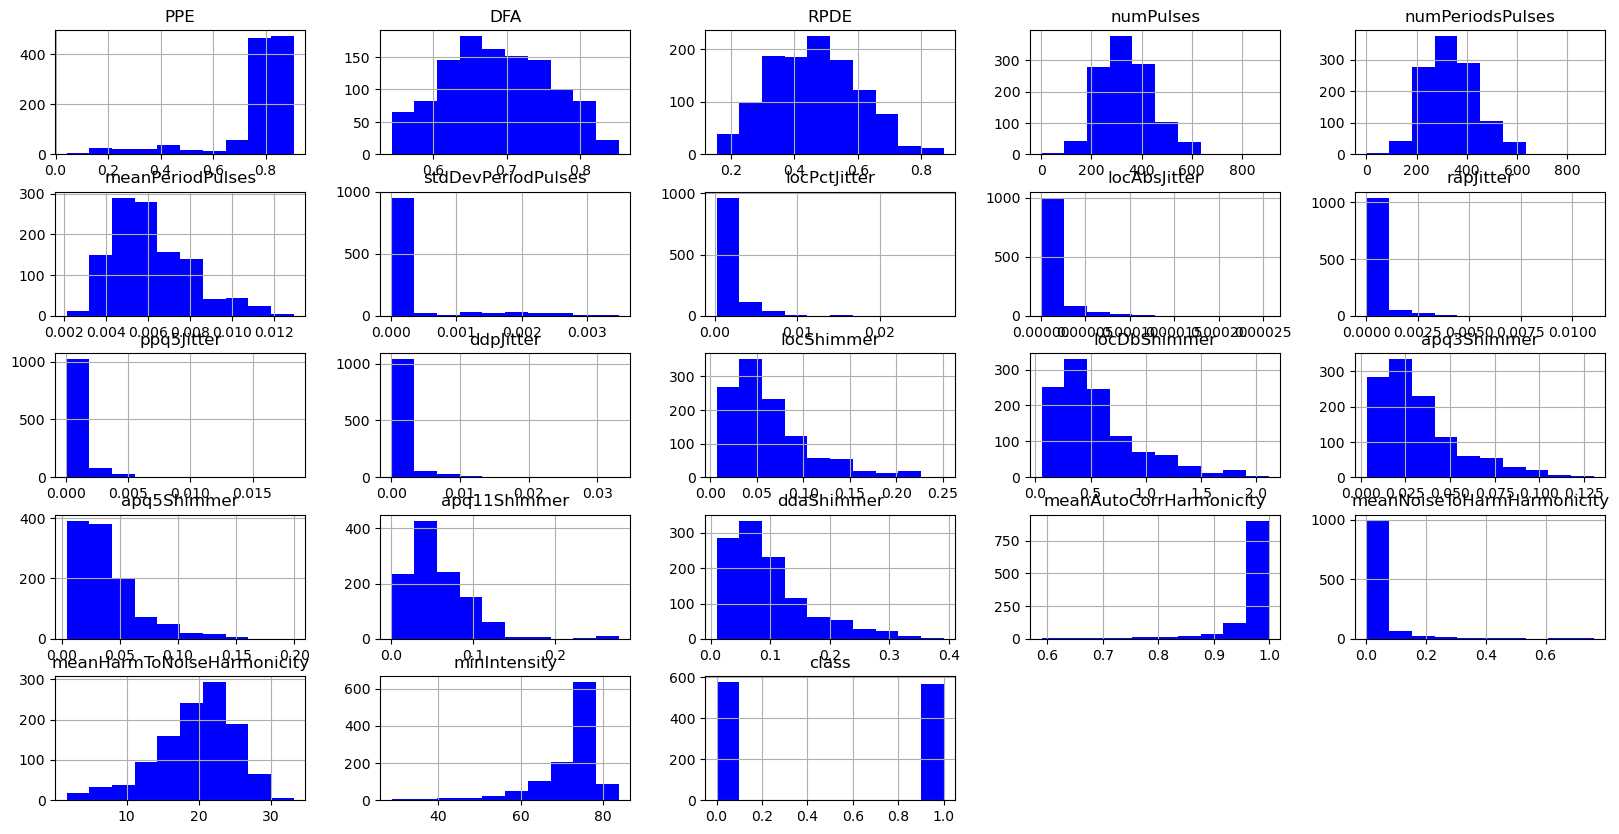

In [13]:
baseline_data.hist(figsize=(20,10),color='b')
plt.show()

**COUNT PLOT**

Negative (0-Healthy): 576
Positive (1-Parkinson_disease): 564


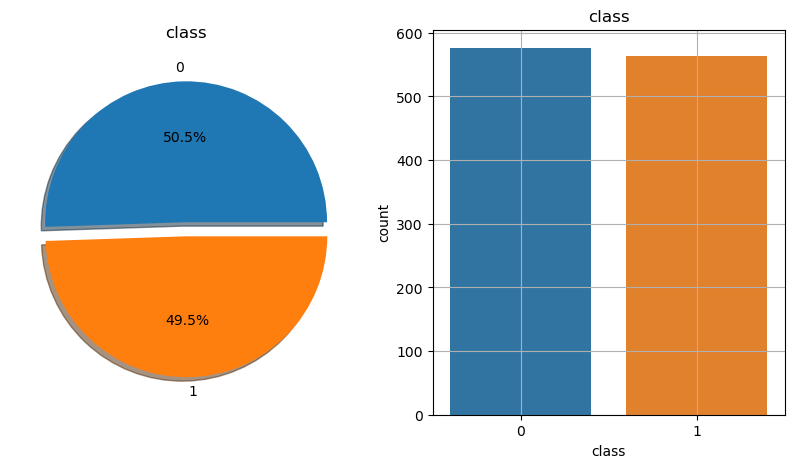

In [14]:
f,ax=plt.subplots(1,2,figsize=(10,5))
baseline_data['class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('class')
ax[0].set_ylabel('')
sns.countplot(x='class', data=baseline_data, ax=ax[1])
ax[1].set_title('class')
N,P = baseline_data['class'].value_counts()
print('Negative (0-Healthy):',N)
print('Positive (1-Parkinson_disease):',P)
plt.grid()
plt.show()

**CORRELATION**

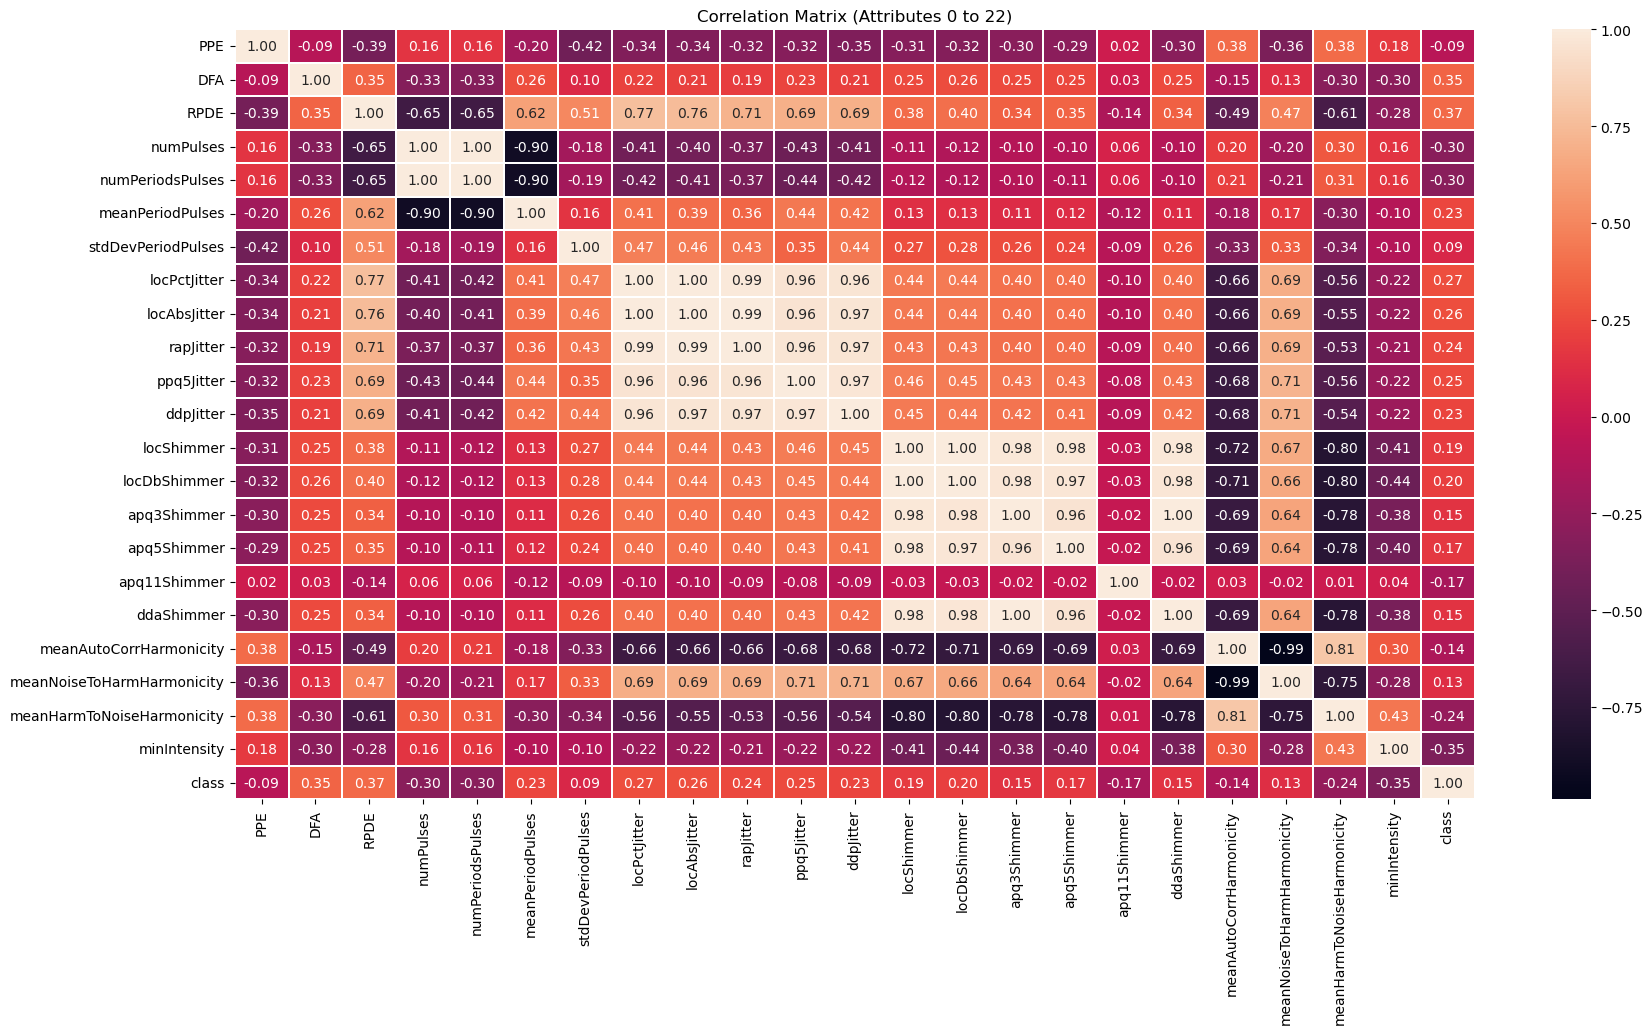

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(baseline_data.corr(), annot=True, fmt=".2f", linewidths="1.2")
plt.title('Correlation Matrix (Attributes 0 to 22)')
plt.show()

**BOX PLOT**

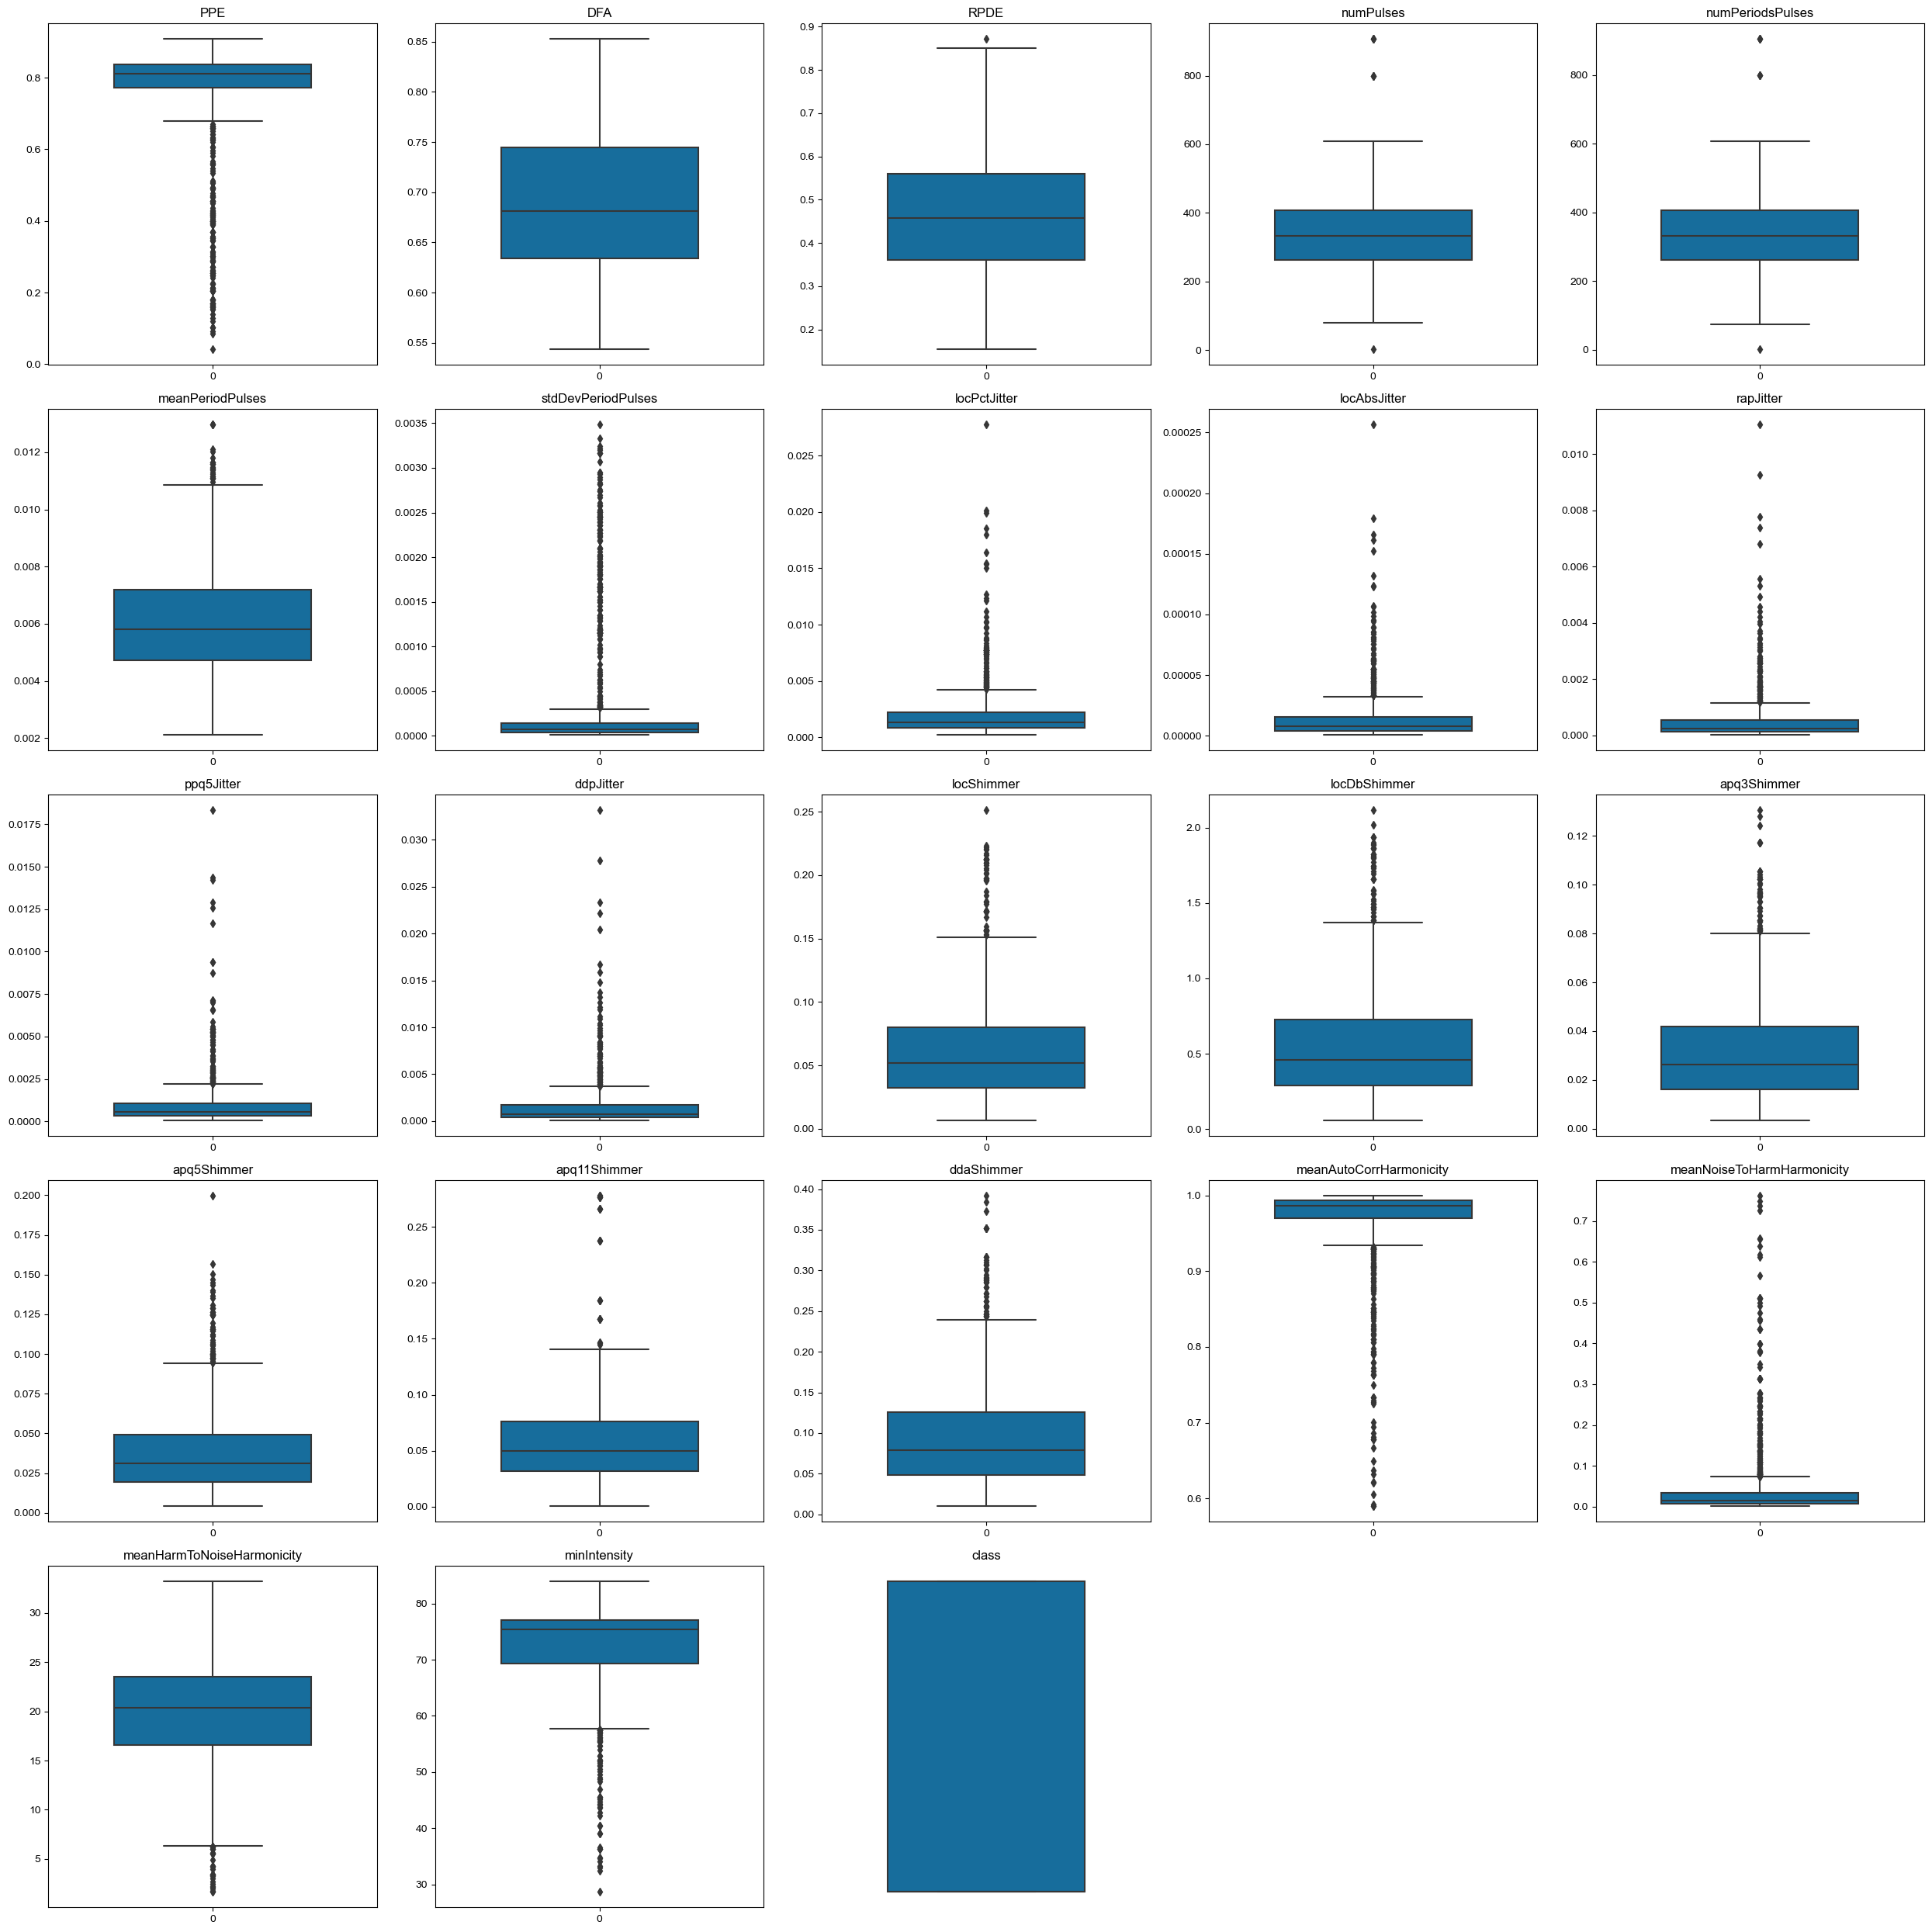

In [16]:
fig, axes = plt.subplots(5, 5, figsize=(25, 25))

sns.set_style("whitegrid")

sns.boxplot(data=baseline_data['PPE'], orient="v", width=0.6, palette="colorblind", ax=axes[0, 0]).set(title="PPE")
sns.boxplot(data=baseline_data['DFA'], orient="v", width=0.6, palette="colorblind", ax=axes[0, 1]).set(title="DFA")
sns.boxplot(data=baseline_data['RPDE'], orient="v", width=0.6, palette="colorblind", ax=axes[0, 2]).set(title="RPDE")
sns.boxplot(data=baseline_data['numPulses'], orient="v", width=0.6, palette="colorblind", ax=axes[0, 3]).set(title="numPulses")
sns.boxplot(data=baseline_data['numPeriodsPulses'], orient="v", width=0.6, palette="colorblind", ax=axes[0, 4]).set(title="numPeriodsPulses")

sns.boxplot(data=baseline_data['meanPeriodPulses'], orient="v", width=0.6, palette="colorblind", ax=axes[1, 0]).set(title="meanPeriodPulses")
sns.boxplot(data=baseline_data['stdDevPeriodPulses'], orient="v", width=0.6, palette="colorblind", ax=axes[1, 1]).set(title="stdDevPeriodPulses")
sns.boxplot(data=baseline_data['locPctJitter'], orient="v", width=0.6, palette="colorblind", ax=axes[1, 2]).set(title="locPctJitter")
sns.boxplot(data=baseline_data['locAbsJitter'], orient="v", width=0.6, palette="colorblind", ax=axes[1, 3]).set(title="locAbsJitter")
sns.boxplot(data=baseline_data['rapJitter'], orient="v", width=0.6, palette="colorblind", ax=axes[1, 4]).set(title="rapJitter")

sns.boxplot(data=baseline_data['ppq5Jitter'], orient="v", width=0.6, palette="colorblind", ax=axes[2, 0]).set(title="ppq5Jitter")
sns.boxplot(data=baseline_data['ddpJitter'], orient="v", width=0.6, palette="colorblind", ax=axes[2, 1]).set(title="ddpJitter")
sns.boxplot(data=baseline_data['locShimmer'], orient="v", width=0.6, palette="colorblind", ax=axes[2, 2]).set(title="locShimmer")
sns.boxplot(data=baseline_data['locDbShimmer'], orient="v", width=0.6, palette="colorblind", ax=axes[2, 3]).set(title="locDbShimmer")
sns.boxplot(data=baseline_data['apq3Shimmer'], orient="v", width=0.6, palette="colorblind", ax=axes[2, 4]).set(title="apq3Shimmer")

sns.boxplot(data=baseline_data['apq5Shimmer'], orient="v", width=0.6, palette="colorblind", ax=axes[3, 0]).set(title="apq5Shimmer")
sns.boxplot(data=baseline_data['apq11Shimmer'], orient="v", width=0.6, palette="colorblind", ax=axes[3, 1]).set(title="apq11Shimmer")
sns.boxplot(data=baseline_data['ddaShimmer'], orient="v", width=0.6, palette="colorblind", ax=axes[3, 2]).set(title="ddaShimmer")
sns.boxplot(data=baseline_data['meanAutoCorrHarmonicity'], orient="v", width=0.6, palette="colorblind", ax=axes[3, 3]).set(title="meanAutoCorrHarmonicity")
sns.boxplot(data=baseline_data['meanNoiseToHarmHarmonicity'], orient="v", width=0.6, palette="colorblind", ax=axes[3, 4]).set(title="meanNoiseToHarmHarmonicity")

sns.boxplot(data=baseline_data['meanHarmToNoiseHarmonicity'], orient="v", width=0.6, palette="colorblind", ax=axes[4, 0]).set(title="meanHarmToNoiseHarmonicity")
sns.boxplot(data=baseline_data['minIntensity'], orient="v", width=0.6, palette="colorblind", ax=axes[4, 1]).set(title="minIntensity")
sns.boxplot(data=baseline_data['class'], orient="v", width=0.6, palette="colorblind", ax=axes[4, 2]).set(title="class")

#To hide the empty subplots
for ax in axes.flatten()[22:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


**DEFINING X AND y VALUES**

In [17]:
feature_col_names = ["PPE", "DFA", "RPDE", "numPulses", "numPeriodsPulses", "meanPeriodPulses", "stdDevPeriodPulses", "locPctJitter", "locAbsJitter", "rapJitter", "ppq5Jitter", "ddpJitter", "locShimmer", "locDbShimmer", "apq3Shimmer", "apq5Shimmer", "apq11Shimmer", "ddaShimmer", "meanAutoCorrHarmonicity", "meanNoiseToHarmHarmonicity", "meanHarmToNoiseHarmonicity", "minIntensity"]
predicted_class_names =['class']

X = baseline_data[feature_col_names].values
y = baseline_data[predicted_class_names].values
print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (1140, 22)
Target (y) Shape Before Balancing : (1140, 1)


**SMOTE**

In [18]:
sm = SMOTE(random_state=300) #smote object is initialized

In [19]:
X, y = sm.fit_resample(X, y) #resampling the data

In [20]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)
     

Feature (X) Shape After Balancing : (1152, 22)
Target (y) Shape After Balancing : (1152,)


**INITIALIZING TRAIN AND TEST VALUES**

In [21]:
y = y.ravel()
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.30, random_state=42)

**APPLYING ML MODELS**

**DECISION TREE**

Accuracy: 0.7832369942196532
Precision: 0.86
Error Rate: 0.2167630057803468
Specificity: 0.8711656441717791
Recall: 0.7049180327868853
F1 Score: 0.7747747747747747
MCC: 0.5802715147045152
LR+: 5.47150663544106
LR-: 0.3387208496882937


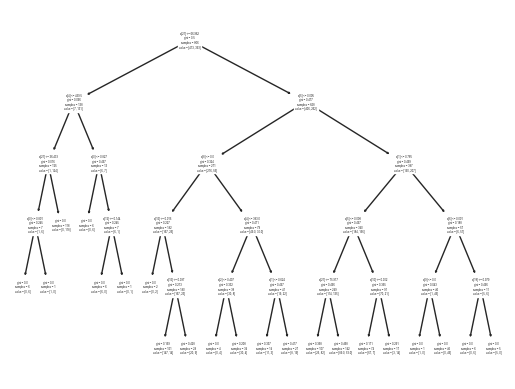

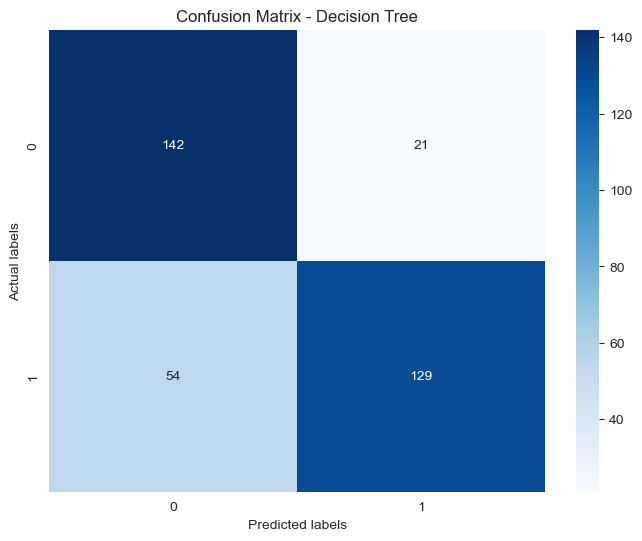

In [22]:
#DT model code
DT_model = DecisionTreeClassifier(max_depth=5, random_state=42)
DT_model.fit(X_train, y_train)
predDT = DT_model.predict(X_test)

#Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, predDT) 

#Calculating accuracy
accuracy_DT = accuracy_score(y_test, predDT) 
print("Accuracy:", accuracy_DT)

#Calculating precision
precision = precision_score(y_test, predDT)

#Calculating error rate
error_rate = 1 - accuracy_score(y_test, predDT)

#Calculating specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

#Calculating recall
recall = recall_score(y_test, predDT)

#Calculating F1 score
f1 = f1_score(y_test, predDT)

#Calculating MCC
mcc = matthews_corrcoef(y_test, predDT)

#Calculating LR+
lr_plus = recall / (1 - specificity)

#Calculating LR-
lr_minus = (1 - recall) / specificity

print("Precision:", precision)
print("Error Rate:", error_rate)
print("Specificity:", specificity)
print("Recall:", recall)
print("F1 Score:", f1)
print("MCC:", mcc)
print("LR+:", lr_plus)
print("LR-:", lr_minus)

#decision tree visualization
plot_tree(DT_model)
plt.show()


#Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

**SUPPORT VECTOR CLASSIFIER**

Accuracy: 0.7023
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       163
           1       0.69      0.80      0.74       183

    accuracy                           0.70       346
   macro avg       0.71      0.70      0.70       346
weighted avg       0.71      0.70      0.70       346

Error Rate: 0.2977
Specificity: 0.5890
MCC: 0.4031
FPR: 0.4110
LR+: 2.1940
LR-: 0.3750


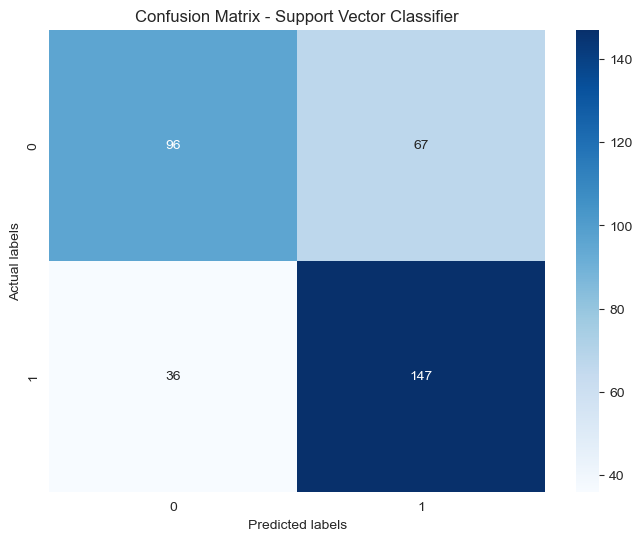

In [23]:
#SVC model
svc_model = SVC(random_state=42)
svc_model = svc_model.fit(X_train, y_train)
predSVC = svc_model.predict(X_test)

#Calculating accuray
accuracy_SVC = accuracy_score(y_test, predSVC)
print(f"Accuracy: {accuracy_SVC:.4f}")

print("Classification Report:")
print(classification_report(y_test, predSVC))

conf_matrix = confusion_matrix(y_test, predSVC)

#error rate
total_samples = np.sum(conf_matrix)
correct_predictions = np.trace(conf_matrix)
error = total_samples - correct_predictions
error_rate = error / total_samples
print(f"Error Rate: {error_rate:.4f}")

#specificity
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
specificity = true_negative / (true_negative + false_positive)
print(f"Specificity: {specificity:.4f}")

#MCC
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))


#FPR (False Positive Rate)
fpr = fp / (fp + tn)

#LR+ (Likelihood Ratio Positive)
lr_plus = tp / fp

#LR- (Likelihood Ratio Negative)
lr_minus = fn / tn

print(f"MCC: {mcc:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"LR+: {lr_plus:.4f}")
print(f"LR-: {lr_minus:.4f}")

#Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Support Vector Classifier")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

**RANDOM FOREST**

Accuracy: 0.8931
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       163
           1       0.95      0.85      0.89       183

    accuracy                           0.89       346
   macro avg       0.90      0.90      0.89       346
weighted avg       0.90      0.89      0.89       346

Error Rate: 0.1069
Specificity: 0.9448
MCC: 0.7915
FPR: 0.0552
LR+: 17.2222
LR-: 0.1818


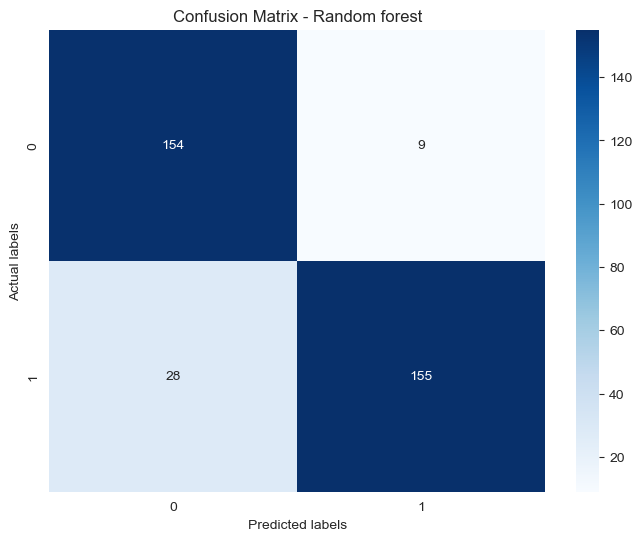

In [24]:
#Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=0)
rf_model = rf_model.fit(X_train, y_train)
predRF = rf_model.predict(X_test)

#accuracy
accuracy_RF = accuracy_score(y_test, predRF)
print(f"Accuracy: {accuracy_RF:.4f}")

print("Classification Report:")
print(classification_report(y_test, predRF))

#confusion matrix
conf_matrix = confusion_matrix(y_test, predRF)

#error rate
total_samples = np.sum(conf_matrix)
correct_predictions = np.trace(conf_matrix)
error = total_samples - correct_predictions
error_rate = error / total_samples
print(f"Error Rate: {error_rate:.4f}")

#specificity
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
specificity = true_negative / (true_negative + false_positive)
print(f"Specificity: {specificity:.4f}")

#MCC
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

#FPR (False Positive Rate)
fpr = fp / (fp + tn)

#LR+ (Likelihood Ratio Positive)
lr_plus = tp / fp

#LR- (Likelihood Ratio Negative)
lr_minus = fn / tn

print(f"MCC: {mcc:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"LR+: {lr_plus:.4f}")
print(f"LR-: {lr_minus:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random forest")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

**EXTREME GRADIENT BOOST**

Accuracy: 0.9075
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       163
           1       0.95      0.87      0.91       183

    accuracy                           0.91       346
   macro avg       0.91      0.91      0.91       346
weighted avg       0.91      0.91      0.91       346

Error Rate: 0.0925
Specificity: 0.9448
MCC: 0.8180
FPR: 0.0552
LR+: 17.7778
LR-: 0.1494


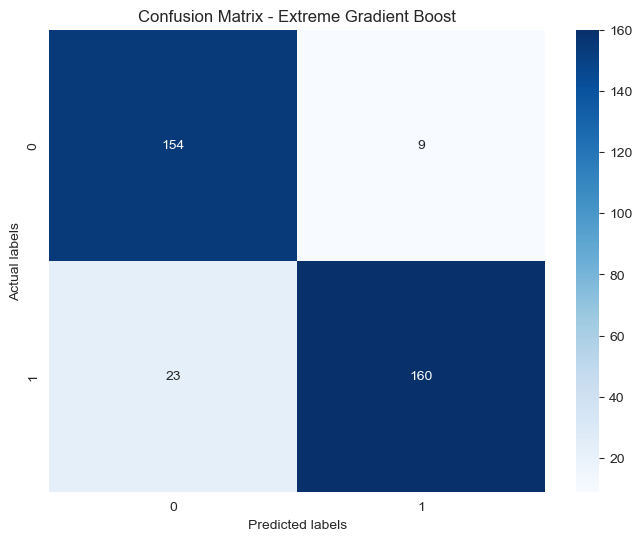

In [25]:
#XGBoost model
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model = xgb_model.fit(X_train, y_train)
predXGB = xgb_model.predict(X_test)

#accuracy
accuracy_XGB = accuracy_score(y_test, predXGB)
print(f"Accuracy: {accuracy_XGB:.4f}")

print("Classification Report:")
print(classification_report(y_test, predXGB))

#confusion matrix
conf_matrix = confusion_matrix(y_test, predXGB)

#error rate
total_samples = np.sum(conf_matrix)
correct_predictions = np.trace(conf_matrix)
error = total_samples - correct_predictions
error_rate = error / total_samples
print(f"Error Rate: {error_rate:.4f}")

#specificity
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
specificity = true_negative / (true_negative + false_positive)
print(f"Specificity: {specificity:.4f}")

#MCC
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

#FPR (False Positive Rate)
fpr = fp / (fp + tn)

#LR+ (Likelihood Ratio Positive)
lr_plus = tp / fp

#LR- (Likelihood Ratio Negative)
lr_minus = fn / tn

if fp != 0:
    lr_plus = tp / fp
else:
    lr_plus = np.inf  
    
print(f"MCC: {mcc:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"LR+: {lr_plus:.4f}")
print(f"LR-: {lr_minus:.4f}")

#Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Extreme Gradient Boost")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

**LOGISTIC REGRESSION**

Accuracy: 0.6908
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       163
           1       0.75      0.62      0.68       183

    accuracy                           0.69       346
   macro avg       0.70      0.70      0.69       346
weighted avg       0.70      0.69      0.69       346

Error Rate: 0.3092
Specificity: 0.7730
MCC: 0.3933
FPR: 0.2270
LR+: 3.0541
LR-: 0.5556


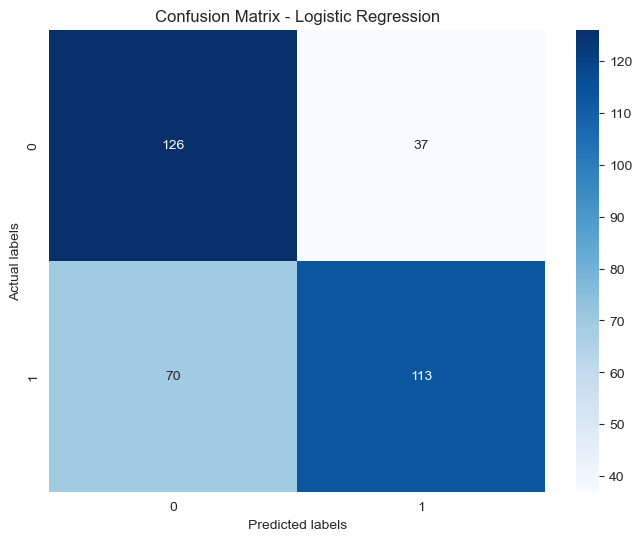

In [26]:
#Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=0, max_iter=1000)
logistic_regression_model = logistic_regression_model.fit(X_train, y_train)
predLR = logistic_regression_model.predict(X_test)

#accuracy
accuracy_LR = accuracy_score(y_test, predLR)
print(f"Accuracy: {accuracy_LR:.4f}")

print("Classification Report:")
print(classification_report(y_test, predLR))

#confusion matrix
conf_matrix = confusion_matrix(y_test, predLR)

#error rate
total_samples = np.sum(conf_matrix)
correct_predictions = np.trace(conf_matrix)
error = total_samples - correct_predictions
error_rate = error / total_samples
print(f"Error Rate: {error_rate:.4f}")

#specificity
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
specificity = true_negative / (true_negative + false_positive)
print(f"Specificity: {specificity:.4f}")

#MCC
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

#FPR (False Positive Rate)
fpr = fp / (fp + tn)

#LR+ (Likelihood Ratio Positive)
lr_plus = tp / fp

#LR- (Likelihood Ratio Negative)
lr_minus = fn / tn

print(f"MCC: {mcc:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"LR+: {lr_plus:.4f}")
print(f"LR-: {lr_minus:.4f}")

#Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

**Model Comparison**

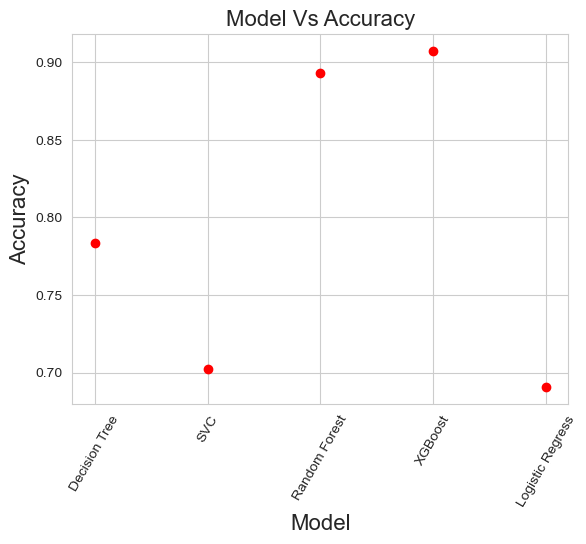

In [27]:
total_accuracy = {
    'Decision Tree': accuracy_DT,
    'SVC': accuracy_SVC,
    'Random Forest': accuracy_RF,
    'XGBoost': accuracy_XGB,
    'Logistic Regression': accuracy_LR
}

#Plotting
data = list(total_accuracy.values())
labels = list(total_accuracy.keys())

plt.plot([i for i, e in enumerate(data)], data, 'ro')
plt.xticks([i for i, e in enumerate(labels)], [l[0:16] for l in labels])
plt.title("Model Vs Accuracy", fontsize=16)
plt.xlabel('Model', fontsize=16)
plt.xticks(rotation=60)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

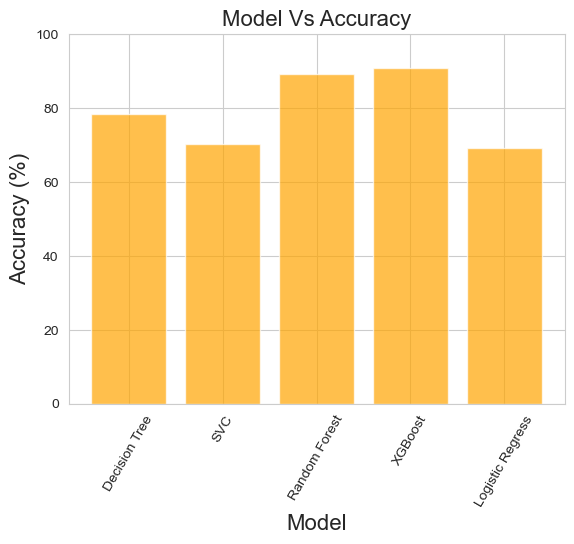

In [28]:
total_accuracy = {
    'Decision Tree': accuracy_DT,
    'SVC': accuracy_SVC,
    'Random Forest': accuracy_RF,
    'XGBoost': accuracy_XGB,
    'Logistic Regression': accuracy_LR
}

# Convert accuracy values to percentages
data = [acc * 100 for acc in total_accuracy.values()]
labels = list(total_accuracy.keys())

# Plotting
plt.bar([i for i, e in enumerate(data)], data, color=['orange'], alpha=0.7)
plt.xticks([i for i, e in enumerate(labels)], [l[0:16] for l in labels], rotation=60)
plt.title("Model Vs Accuracy", fontsize=16)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentage
plt.show()



**FEATURE SELECTION**

**EXTREME GRADIENT BOOST BASED FEATURE SELECTION**

Accuracy: 0.9075


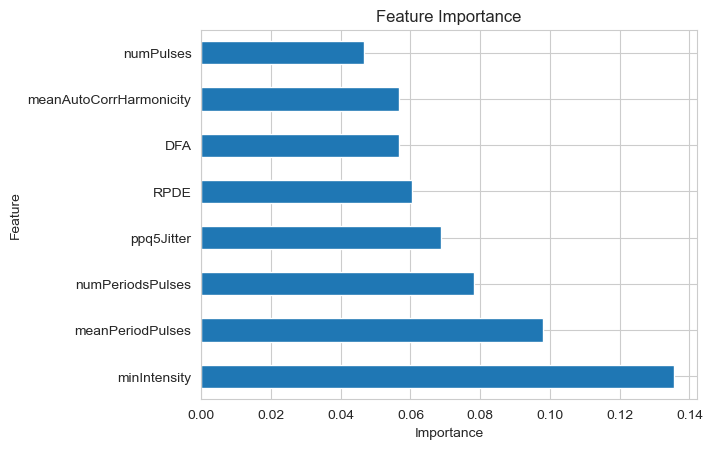

In [29]:
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model = xgb_model.fit(X_train, y_train)
predXGB = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predXGB)
print(f"Accuracy: {accuracy:.4f}")

#plottig
feat_importance = pd.Series(xgb_model.feature_importances_, index=feature_col_names)
feat_importance.nlargest(8).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**RANDOM FOREST BASED FEATURE SELECTION**

Accuracy: 0.8931


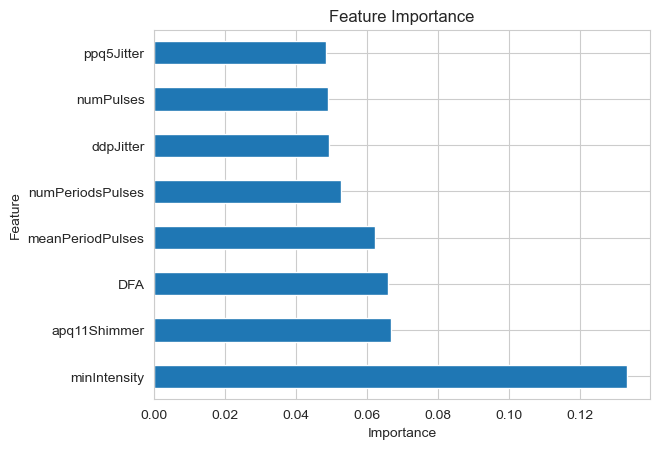

In [30]:
rf_model = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=0)
rf_model = rf_model.fit(X_train, y_train)
predRF = rf_model.predict(X_test)

accuracy_RF = accuracy_score(y_test, predRF)
print(f"Accuracy: {accuracy_RF:.4f}")


#Plotting
feat_importance = pd.Series(rf_model.feature_importances_, index=feature_col_names)
feat_importance.nlargest(8).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**10-FOLD CROSS VALIDATION**

**RANDOM FOREST**

Cross-Validation Scores: [0.96551724 0.9137931  0.93913043 0.96521739 0.93913043 0.97391304
 0.9826087  0.93913043 0.93913043 0.93043478]
Mean Accuracy: 0.94880059970015


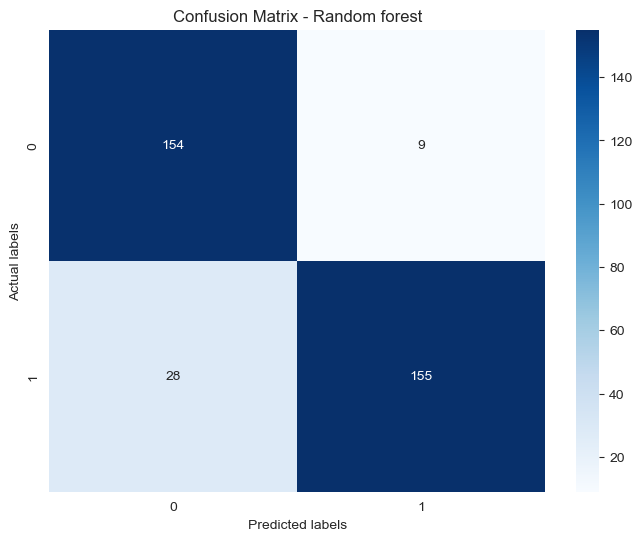

In [31]:
rf_model = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=0)
rf_model = rf_model.fit(X_train, y_train)
predRF = rf_model.predict(X_test)


#Defining the number of folds
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

#Performing 10-fold cross-validation
scores = cross_val_score(rf_model, X, y, cv=k_fold, scoring='accuracy')

print("Cross-Validation Scores:", scores)
mean_accuracy_RF = scores.mean()
print("Mean Accuracy:", mean_accuracy_RF)
conf_matrix = confusion_matrix(y_test, predRF)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random forest")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()


**EXTREME GRADIENT BOOST**

Cross-Validation Scores: [0.98275862 0.95689655 0.97391304 0.96521739 0.9826087  0.94782609
 0.97391304 0.93043478 0.92173913 0.96521739]
Mean Accuracy: 0.9600524737631184


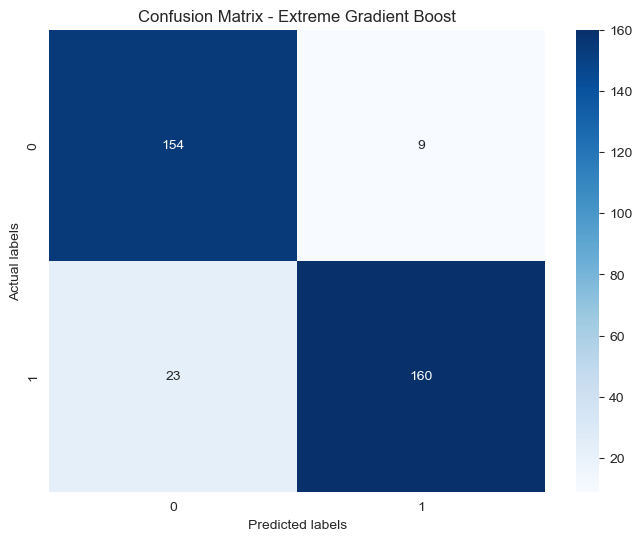

In [32]:
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model = xgb_model.fit(X_train, y_train)
predXGB = xgb_model.predict(X_test)

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(xgb_model, X, y, cv=k_fold, scoring='accuracy')

print("Cross-Validation Scores:", scores)
mean_accuracy_XGB = scores.mean()
print("Mean Accuracy:", mean_accuracy_XGB)
conf_matrix = confusion_matrix(y_test, predXGB)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Extreme Gradient Boost")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()



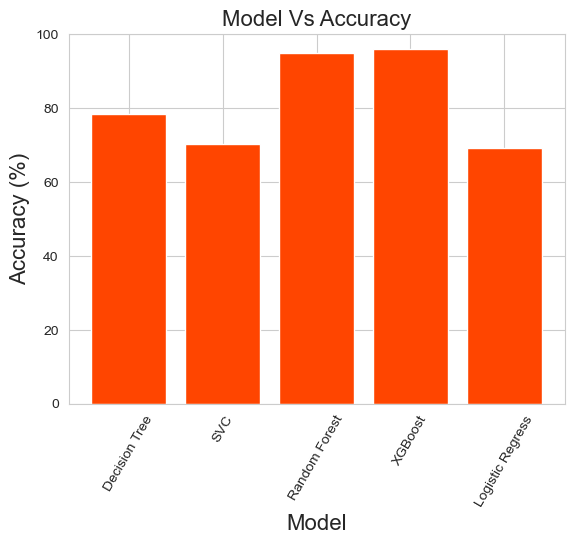

In [33]:
total_accuracy = {
    'Decision Tree': accuracy_DT,
    'SVC': accuracy_SVC,
    'Random Forest': mean_accuracy_RF,
    'XGBoost': mean_accuracy_XGB,
    'Logistic Regression': accuracy_LR
}
data = [acc * 100 for acc in total_accuracy.values()]
labels = list(total_accuracy.keys())

# Plotting
plt.bar([i for i, e in enumerate(data)], data, color='orangered')
plt.xticks([i for i, e in enumerate(labels)], [l[0:16] for l in labels], rotation=60)
plt.title("Model Vs Accuracy", fontsize=16)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.ylim(0, 100)  
plt.show()
